In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/My Drive/Evaluation_4/covid.csv')

In [4]:
df.shape

(114508, 17)

In [5]:
df.head()

,sex,patient_type,intubed,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,cardiovascular,obesity,renal_chronic,tobacco,icu,days,fatal
0,1,0,0.0,0.0,0.450000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.071429,0
1,0,0,0.0,1.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0
2,1,0,0.0,0.0,0.500000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,1
3,0,0,0.0,1.0,0.391667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1
4,0,0,0.0,0.0,0.525000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.128571,0


In [31]:
X = df.drop(columns = ['fatal'], axis = 1)
y = df.filter(['fatal'], axis = 1)

In [32]:
model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(16,), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:

model_d = keras.Sequential([
    keras.layers.Dense(16, input_shape=(16,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model_d.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [34]:
# model.fit(X_train, y_train, epochs=500)
# model.evaluate(X_test, y_test)

In [10]:
# y_pred = model.predict(X_test).reshape(-1)
# print(y_pred[:10])

# # round the values to nearest integer ie 0 or 1
# y_pred = np.round(y_pred)
# print(y_pred[:10])

In [11]:
# y_test[:10]

In [12]:
# from sklearn.metrics import confusion_matrix , classification_report
# print(classification_report(y_test, y_pred))

In [13]:
# import seaborn as sn
# cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

# plt.figure(figsize = (10,7))
# sn.heatmap(cm, annot=True, fmt='d')
# plt.xlabel('Predicted')
# plt.ylabel('Truth')

In [14]:
# model_d.fit(X_train, y_train, epochs=500)
# model_d.evaluate(X_test, y_test)

In [15]:
# y_pred = model_d.predict(X_test).reshape(-1)
# print(y_pred[:10])
# # 
# # round the values to nearest integer ie 0 or 1
# y_pred = np.round(y_pred)
# print(y_pred[:10])

In [16]:
# y_test[:10]

In [17]:
# from sklearn.metrics import confusion_matrix , classification_report
# print(classification_report(y_test, y_pred))

In [18]:
# import seaborn as sn
# cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

# plt.figure(figsize = (10,7))
# sn.heatmap(cm, annot=True, fmt='d')
# plt.xlabel('Predicted')
# plt.ylabel('Truth')

In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)
# y_sm=y_sm.squeeze()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=1, stratify=y_sm)
y_train=y_train.squeeze()

In [44]:
# Number of classes in training Data
y_train

array([1, 0, 1, ..., 0, 1, 1])

In [45]:
model.fit(X_train, y_train, epochs=500)
model.evaluate(X_test, y_test)

Epoch 1/500
3912/3912 [==============================] - 7s 1ms/step - loss: 0.5079 - accuracy: 0.7428
Epoch 2/500
3912/3912 [==============================] - 5s 1ms/step - loss: 0.4547 - accuracy: 0.7825
Epoch 3/500
3912/3912 [==============================] - 6s 1ms/step - loss: 0.4546 - accuracy: 0.7822
Epoch 4/500
3912/3912 [==============================] - 6s 2ms/step - loss: 0.4515 - accuracy: 0.7835
Epoch 5/500
3912/3912 [==============================] - 6s 1ms/step - loss: 0.4477 - accuracy: 0.7871
Epoch 6/500
3912/3912 [==============================] - 6s 1ms/step - loss: 0.4474 - accuracy: 0.7860
Epoch 7/500
3912/3912 [==============================] - 5s 1ms/step - loss: 0.4501 - accuracy: 0.7845
Epoch 8/500
3912/3912 [==============================] - 5s 1ms/step - loss: 0.4504 - accuracy: 0.7847
Epoch 9/500
3912/3912 [==============================] - 5s 1ms/step - loss: 0.4492 - accuracy: 0.7839
Epoch 10/500
3912/3912 [==============================] - 5s 1ms/step - l

[0.44439032673835754, 0.7890753149986267]

In [46]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

[0.7962465  0.46757764 0.00828764 0.6556952  0.10431704 0.60387695
 0.7285979  0.7386123  0.57094693 0.70135564]
[1. 0. 0. 1. 0. 1. 1. 1. 1. 1.]


In [47]:
y_test[:10]

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [48]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.68      0.76     26820
           1       0.74      0.90      0.81     26820

    accuracy                           0.79     53640
   macro avg       0.80      0.79      0.79     53640
weighted avg       0.80      0.79      0.79     53640



Text(69.0, 0.5, 'Truth')

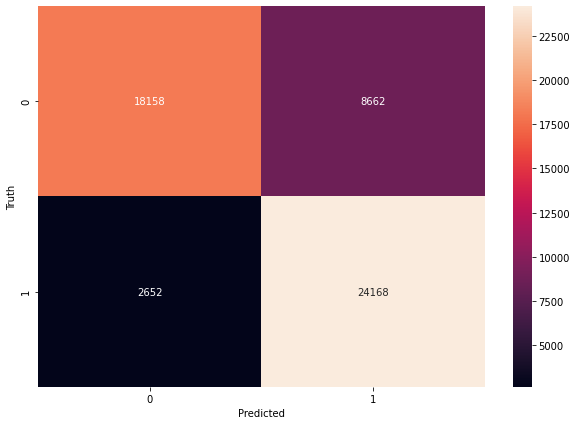

In [49]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
model_d.fit(X_train, y_train, epochs=500)
model_d.evaluate(X_test, y_test)

Epoch 1/500
3912/3912 [==============================] - 6s 1ms/step - loss: 0.6550 - accuracy: 0.5757
Epoch 2/500
3912/3912 [==============================] - 5s 1ms/step - loss: 0.5751 - accuracy: 0.6737
Epoch 3/500
3912/3912 [==============================] - 5s 1ms/step - loss: 0.5621 - accuracy: 0.6830
Epoch 4/500
3912/3912 [==============================] - 5s 1ms/step - loss: 0.5561 - accuracy: 0.6860
Epoch 5/500
3912/3912 [==============================] - 5s 1ms/step - loss: 0.5584 - accuracy: 0.6890
Epoch 6/500
3912/3912 [==============================] - 5s 1ms/step - loss: 0.5533 - accuracy: 0.6923
Epoch 7/500
3912/3912 [==============================] - 5s 1ms/step - loss: 0.5516 - accuracy: 0.6926
Epoch 8/500
3912/3912 [==============================] - 6s 1ms/step - loss: 0.5516 - accuracy: 0.6915
Epoch 9/500
3912/3912 [==============================] - 6s 2ms/step - loss: 0.5539 - accuracy: 0.6902
Epoch 10/500
3912/3912 [==============================] - 5s 1ms/step - l

[0.46417003870010376, 0.7837620973587036]

In [51]:
y_pred = model_d.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

[0.64186066 0.5076533  0.0207561  0.6249318  0.15356499 0.62237436
 0.6406225  0.66248703 0.616245   0.5907083 ]
[1. 1. 0. 1. 0. 1. 1. 1. 1. 1.]


In [52]:
y_test[:10]

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [53]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75     26820
           1       0.72      0.93      0.81     26820

    accuracy                           0.78     53640
   macro avg       0.81      0.78      0.78     53640
weighted avg       0.81      0.78      0.78     53640



Text(69.0, 0.5, 'Truth')

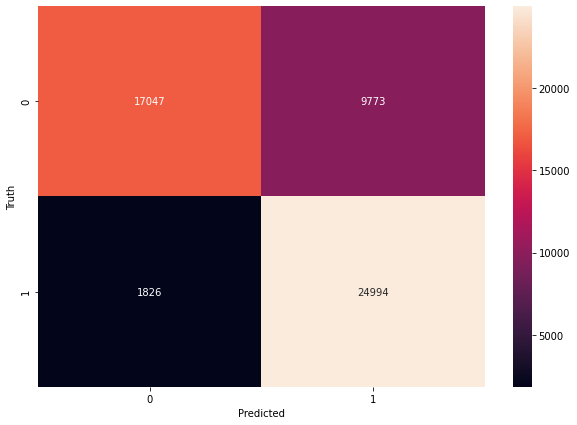

In [54]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')